Here we build a machine learning model(decision tree and naives bayes classifier) to accurately predict whether or not the patients in the dataset have diabetes or not?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scikitplot as skplt
import stemgraphic 
import pydotplus
import statsmodels.api as sm
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.impute import KNNImputer
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, normalize

/home/mypc/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/mypc/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mypc/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mypc/.local/lib/python3.6/site-packages/tensorflow/py

### Descriptive analysis:


In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

***Pregnancies***: Number of times pregnant

***Glucose***: Plasma glucose concentration over 2 hours in an oral glucose tolerance test                -milligrams per deciliter (mg/dL) Normal report around 200 mg/dL

***BloodPressure***: Diastolic blood pressure (mm Hg) 

***SkinThickness***: Triceps skin fold thickness (mm) (an indicator of bodyfat)

***Insulin***: 2-Hour serum insulin (mu U/ml)

***BMI***: Body mass index ( (weight in kg)/(height in m) )

***DiabetesPedigreeFunction***: Diabetes pedigree function (a function which scores likelihood                             of diabetes based on family history)

***Age***: Age (years)

***Outcome***: Class variable (0 if non-diabetic, 1 if diabetic)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print("no of duplicates:",data.duplicated().sum())
data.isna().sum()

no of duplicates: 0


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

here no of missing and duplicate values =0

and our data is numerical so let's find the 5 point summary and plot some graphs.

In [5]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Data Validation

In [6]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

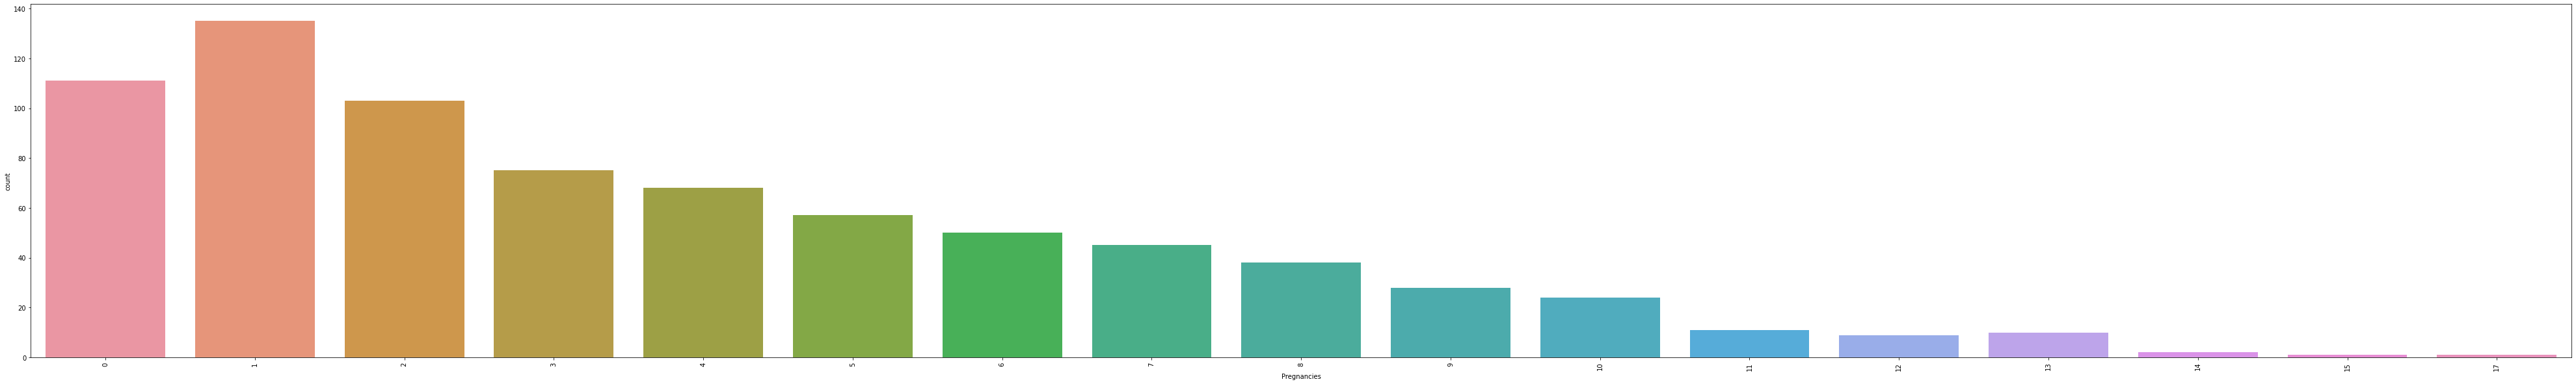

In [7]:
fig_dims = (70,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'Pregnancies',data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [8]:
data['Glucose'].value_counts()

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

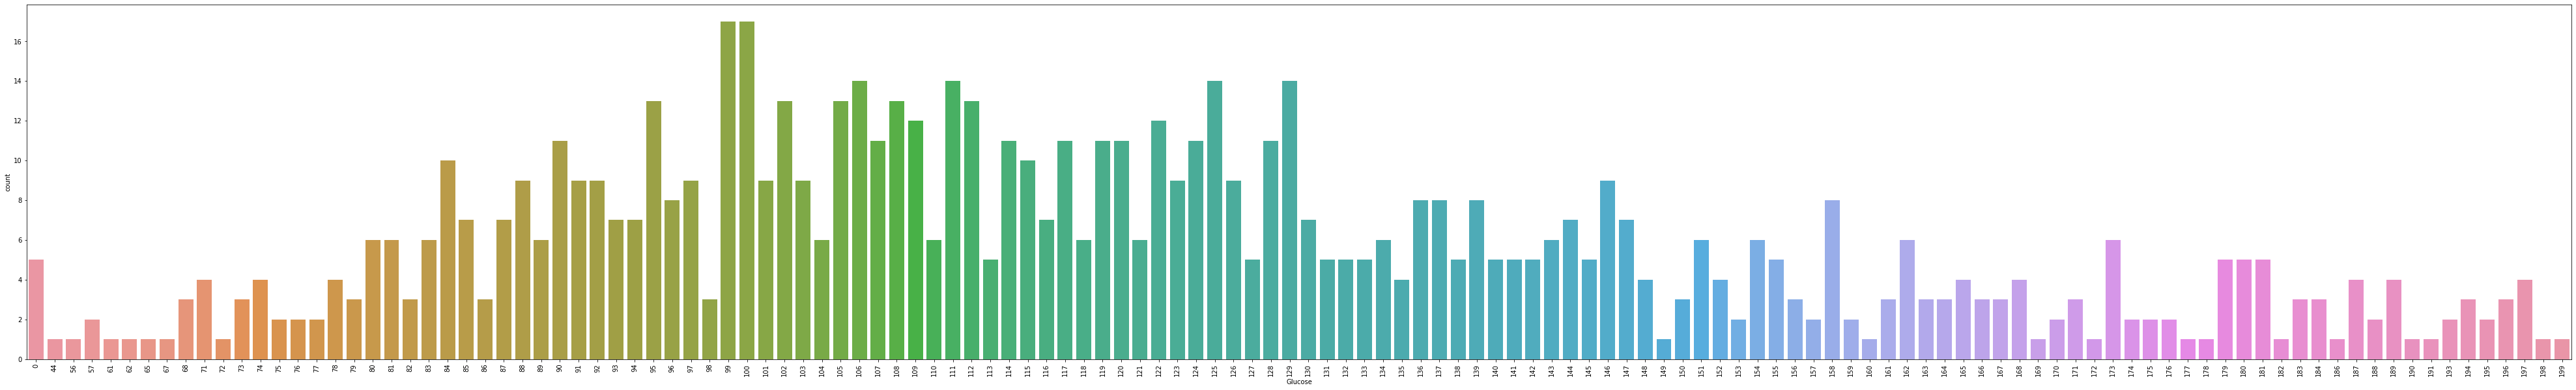

In [9]:
fig_dims = (70,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Glucose',data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [10]:
data['Glucose'] = data['Glucose'].replace(0, np.nan)

clearly glucode levels cant be zero so replacing by Nan

In [11]:
data['BloodPressure'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

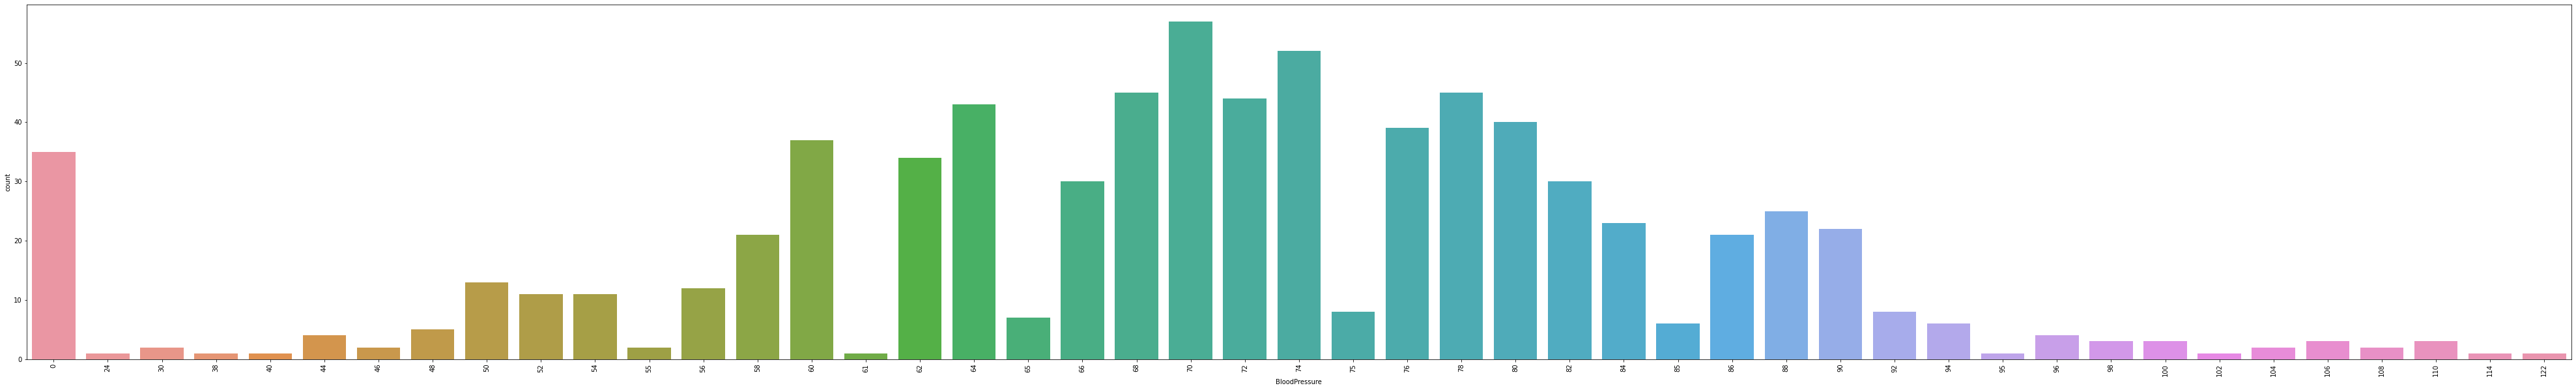

In [12]:
fig_dims = (70,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='BloodPressure',data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [13]:
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)

clearly if BP is zero,we can consider her as dead .that is not possible so replace that values by Nan

In [14]:
data['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

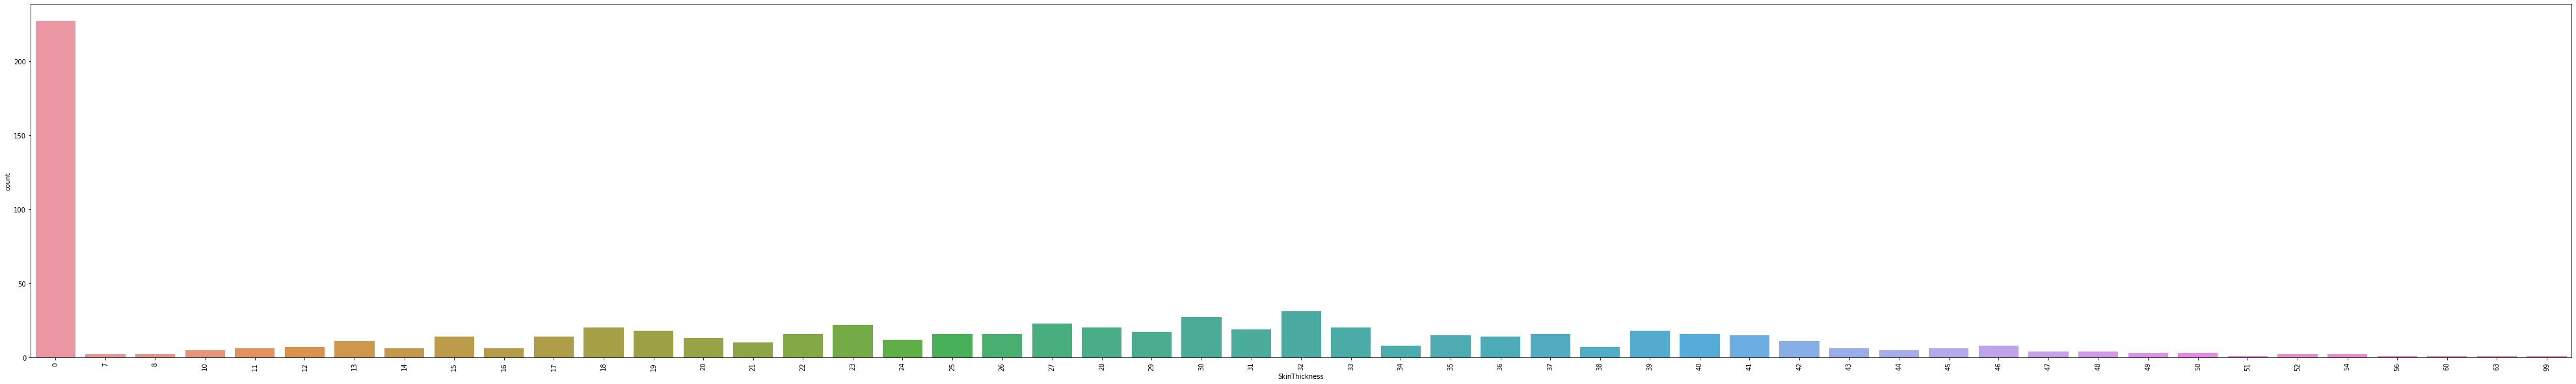

In [15]:
fig_dims = (70,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='SkinThickness',data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

As we can see that the skin thickness of 0 mm is recorded the most in our dataset. Well from an domain expert's advice we realize that the Normal thickness in males is 12 mm; in females, 23 mm. So **for an diabetic patient it must be in this range or higher but not 0 mm. thus we will treat any value less than 23mm as an Nan and treat it as an missing value.**(since our dataset is only related to women)

In [16]:
for i in range(0,23):
    data['SkinThickness'] = data['SkinThickness'].replace(i, np.nan)


In [17]:
data['SkinThickness'].value_counts()

32.0    31
30.0    27
27.0    23
23.0    22
33.0    20
28.0    20
31.0    19
39.0    18
29.0    17
26.0    16
37.0    16
40.0    16
25.0    16
41.0    15
35.0    15
36.0    14
24.0    12
42.0    11
34.0     8
46.0     8
38.0     7
43.0     6
45.0     6
44.0     5
47.0     4
48.0     4
50.0     3
49.0     3
52.0     2
54.0     2
60.0     1
56.0     1
51.0     1
63.0     1
99.0     1
Name: SkinThickness, dtype: int64

In [18]:
data['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

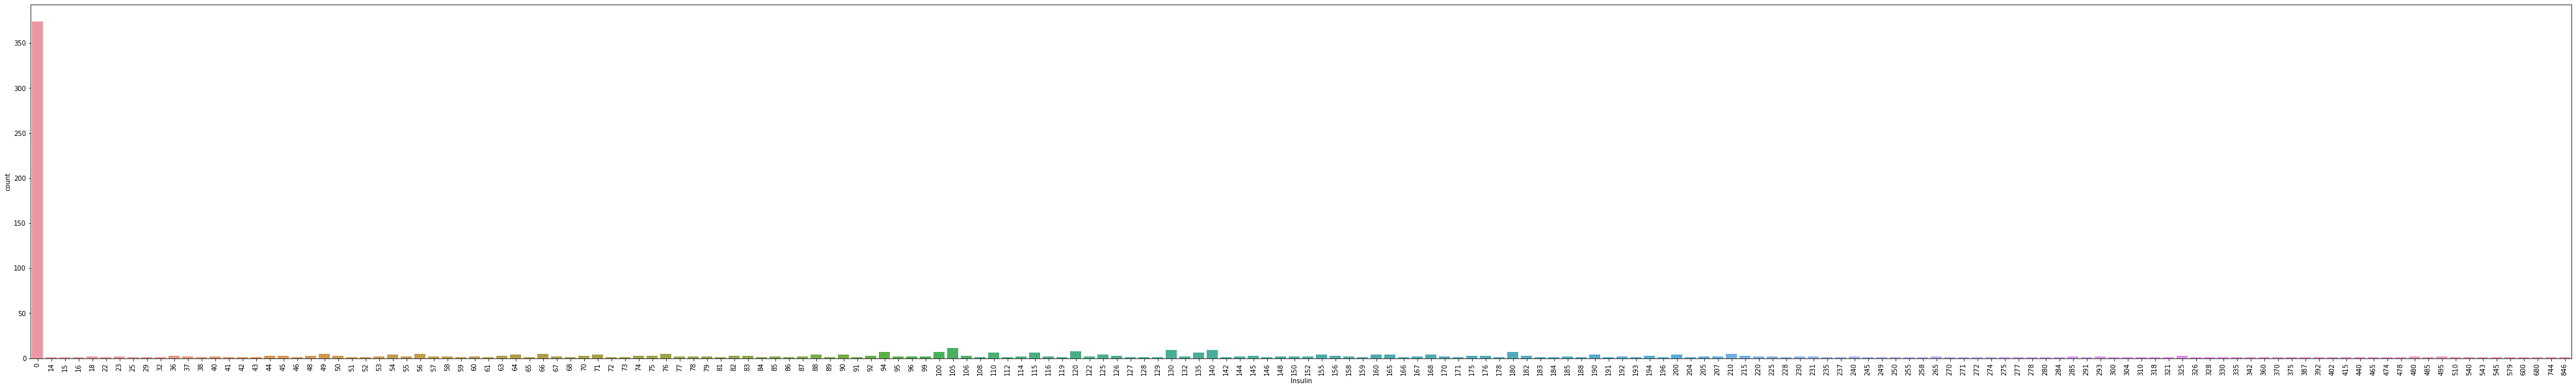

In [19]:
fig_dims = (70,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Insulin',data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

When we check this Insulin column, we see most of the values are 0's. After seeking an expert advice in the Diabetes domain, **It was very clear that the Insulin level cant be 0 (mu U/ml). Thus we need to correct this.** We can replace these values with NAN and treat them as Null values.

In [20]:
data['Insulin'] = data['Insulin'].replace(0, np.nan)

In [21]:
data['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

In [22]:
data['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [23]:
data['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

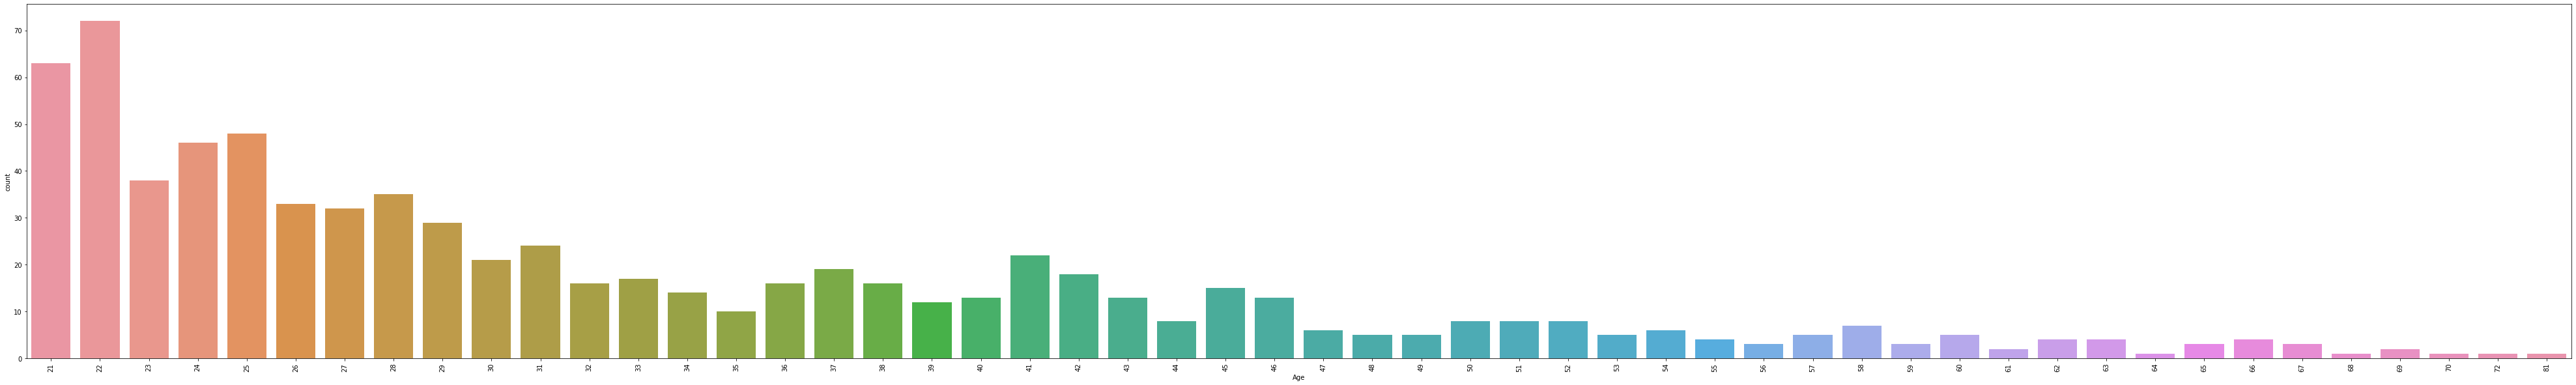

In [24]:
fig_dims = (70,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Age',data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [25]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Data Imputation: 

Now  we changed some invalid values to null values in  "Insulin" and "SkinThickness" columns, we need to handle it.

In [26]:
missing_values = data.isnull().sum()
x = missing_values.to_frame()
total_missing_values = x[0].sum()
missing_values = missing_values / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

Glucose          0.006510
BloodPressure    0.045573
Insulin          0.486979
SkinThickness    0.490885
dtype: float64

we can see that 49% percent of the "Insulin" column, 48% of the "SkinThickness" column ,0.007% of glucose column and 004% of BP columns are filled with null values. Dropping these rows with null values is surely a wrong option. Thus, Lets impute it.
We use KNN imputation here just as we did in descriptive analysis. 

In [27]:
from sklearn.impute import KNNImputer
my_imputer = KNNImputer(n_neighbors=5)
encoded_data = pd.DataFrame(my_imputer.fit_transform(data))

# Fill in the lines below: imputation removed column names; put them back
encoded_data.columns = data.columns
encoded_data.index = data.index

encoded_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.0  33.6   
1          1.0     85.0           66.0           29.0     61.6  26.6   
2          8.0    183.0           64.0           32.0    164.6  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0

In [28]:
encoded_data['Insulin'].value_counts()

105.0    12
130.0     9
140.0     9
120.0     9
100.0     8
         ..
370.0     1
402.0     1
258.0     1
210.4     1
169.0     1
Name: Insulin, Length: 467, dtype: int64

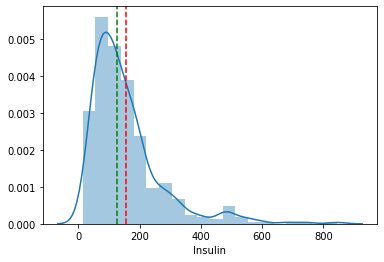

In [29]:
mean = data['Insulin'].mean()
median = data['Insulin'].median()

f, ax_hist = plt.subplots(1)

sns.distplot(data['Insulin'], bins=20, ax=ax_hist)

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

In [30]:
encoded_data['SkinThickness'].value_counts()

32.0    40
30.0    36
27.0    29
31.0    26
33.0    26
        ..
37.2     1
60.0     1
40.4     1
63.0     1
99.0     1
Name: SkinThickness, Length: 102, dtype: int64

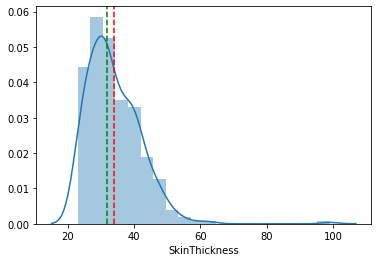

In [31]:
mean = data['SkinThickness'].mean()
median = data['SkinThickness'].median()

f, ax_hist = plt.subplots(1)

sns.distplot(data['SkinThickness'], bins=20, ax=ax_hist)

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

In [32]:
encoded_data['BloodPressure'].value_counts()

70.0     57
74.0     52
72.0     45
68.0     45
78.0     45
         ..
102.0     1
24.0      1
38.0      1
114.0     1
66.4      1
Name: BloodPressure, Length: 69, dtype: int64

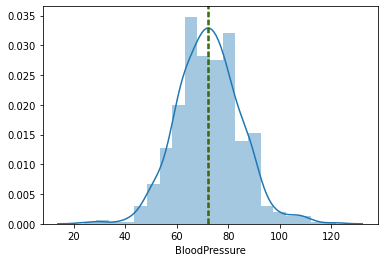

In [33]:
mean = data['BloodPressure'].mean()
median = data['BloodPressure'].median()

f, ax_hist = plt.subplots(1)

sns.distplot(data['BloodPressure'], bins=20, ax=ax_hist)

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

In [34]:
encoded_data['Glucose'].value_counts()

99.0     17
100.0    17
125.0    14
129.0    14
111.0    14
         ..
61.0      1
67.0      1
198.0     1
160.0     1
186.0     1
Name: Glucose, Length: 137, dtype: int64

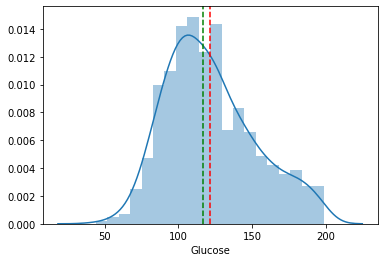

In [35]:
mean = data['Glucose'].mean()
median = data['Glucose'].median()

f, ax_hist = plt.subplots(1)

sns.distplot(data['Glucose'], bins=20, ax=ax_hist)

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')

now let us see the values after encoding the null values

In [36]:
encoded_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.676563      72.351823      32.861198  153.077865   
std       3.369578   30.462695      12.203209       6.580319   97.754656   
min       0.000000   44.000000      24.000000      23.000000   14.000000   
25%       1.000000   99.000000      64.000000      28.200000   88.000000   
50%       3.000000  117.000000      72.000000      32.000000  133.100000   
75%       6.000000  140.250000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [37]:
encoded_data['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

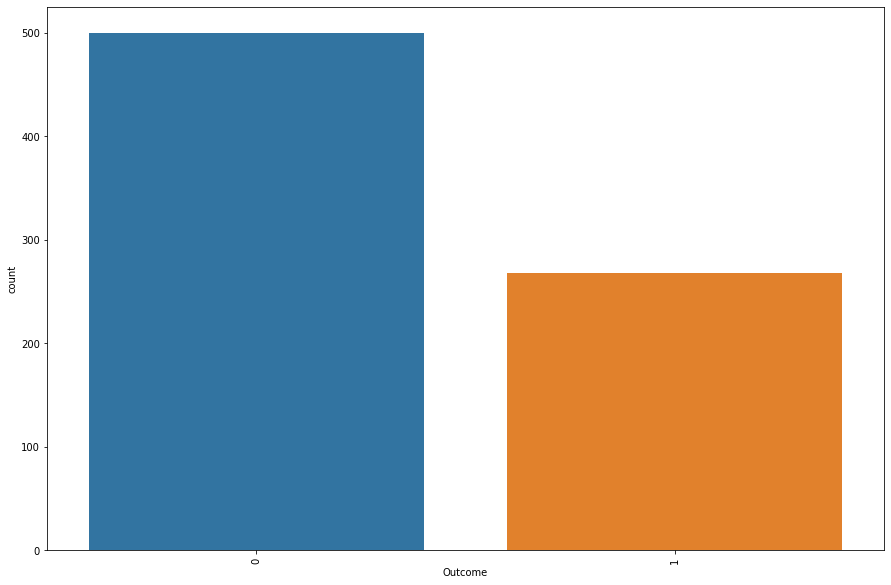

In [38]:
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'Outcome' ,data=data, ax=ax)
plt.xticks(rotation = 90)
plt.show()

 we can see 0 values are far more than one values so we need to oversample our data such that they are in an comparable ratio

In [39]:


X = encoded_data.iloc[:,:-1].values
y = encoded_data.iloc[:,-1].values

print('Shape of Feature Matrix:', X.shape)
print('Shape of Target Vector:', y.shape)

#print('Original Target Variable Distribution:', Counter(y))

ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)

Features, Target = ada.fit_resample(X,y)

#print('Oversampled Target Variable Distribution:', Counter(Target))

df = pd.DataFrame.from_records(Features, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
df['Outcome'] = Target

data1 = df.copy(deep=True)

Shape of Feature Matrix: (768, 8)
Shape of Target Vector: (768,)


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               963 non-null    float64
 1   Glucose                   963 non-null    float64
 2   BloodPressure             963 non-null    float64
 3   SkinThickness             963 non-null    float64
 4   Insulin                   963 non-null    float64
 5   BMI                       963 non-null    float64
 6   DiabetesPedigreeFunction  963 non-null    float64
 7   Age                       963 non-null    float64
 8   Outcome                   963 non-null    float64
dtypes: float64(9)
memory usage: 67.8 KB


In [41]:
data1['Outcome'].value_counts()

0.0    500
1.0    463
Name: Outcome, dtype: int64

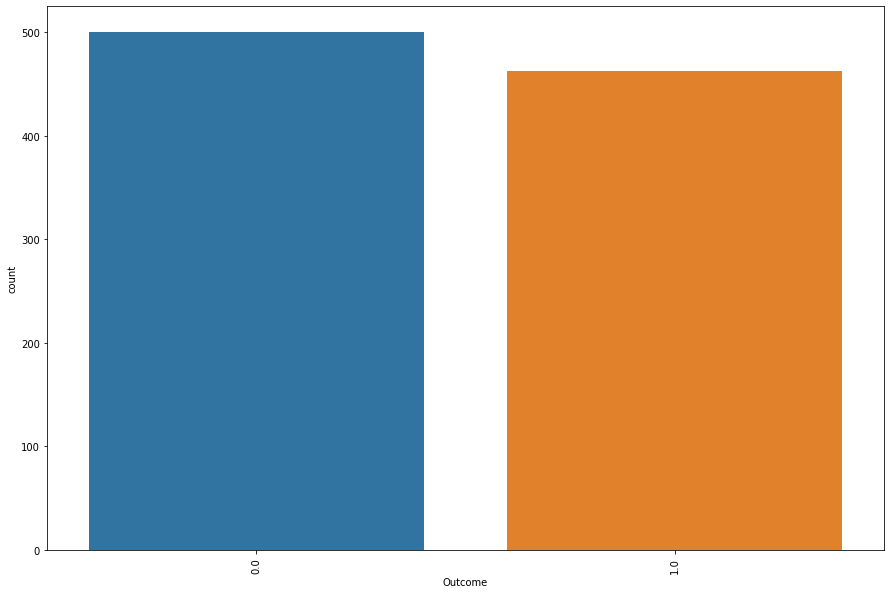

In [42]:
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'Outcome' ,data=data1, ax=ax)
plt.xticks(rotation = 90)
plt.show()

Now we can see they are in comparablly equal ratio.


we know except BMI and Pedigree funcn no other columns cannot take float values . so let us convert them to int 

In [43]:
def clean_balanced_dataset():

  col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','Age', 'Outcome']

  for index,value in enumerate(col):
    list_ = []
    for j in data1[value]:
      list_.append(round(j))
    
    x = {value:list_}
    if index == 0:
      df = pd.DataFrame(x)
    else:
      df[value] = pd.DataFrame(x)

  df['BMI'] = data1['BMI']
  df['DiabetesPedigreeFunction'] = data1['DiabetesPedigreeFunction']
  l = {'Outcome':df['Outcome']}
  df.drop('Outcome', axis=1, inplace=True)
  df['Outcome'] = pd.DataFrame(l)
  
  return df

In [44]:
data2 = clean_balanced_dataset()
print(data2.info())
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               963 non-null    int64  
 1   Glucose                   963 non-null    int64  
 2   BloodPressure             963 non-null    int64  
 3   SkinThickness             963 non-null    int64  
 4   Insulin                   963 non-null    int64  
 5   Age                       963 non-null    int64  
 6   BMI                       963 non-null    float64
 7   DiabetesPedigreeFunction  963 non-null    float64
 8   Outcome                   963 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 67.8 KB
None


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  Age   BMI  \
0            6      148             72             35      169   50  33.6   
1            1       85             66             29       62   31  26.6   
2            8      183             64             32      165   32  23.3   
3            1       89             66             23       94   21  28.1   
4            0      137             40             35      168   33  43.1   

   DiabetesPedigreeFunction  Outcome  
0                     0.627        1  
1                     0.351        0  
2                     0.672        1  
3                     0.167        0  
4                     2.288        1

### Data Visualization:

Let's visual our data and try to understand the underlying relationships between our features:

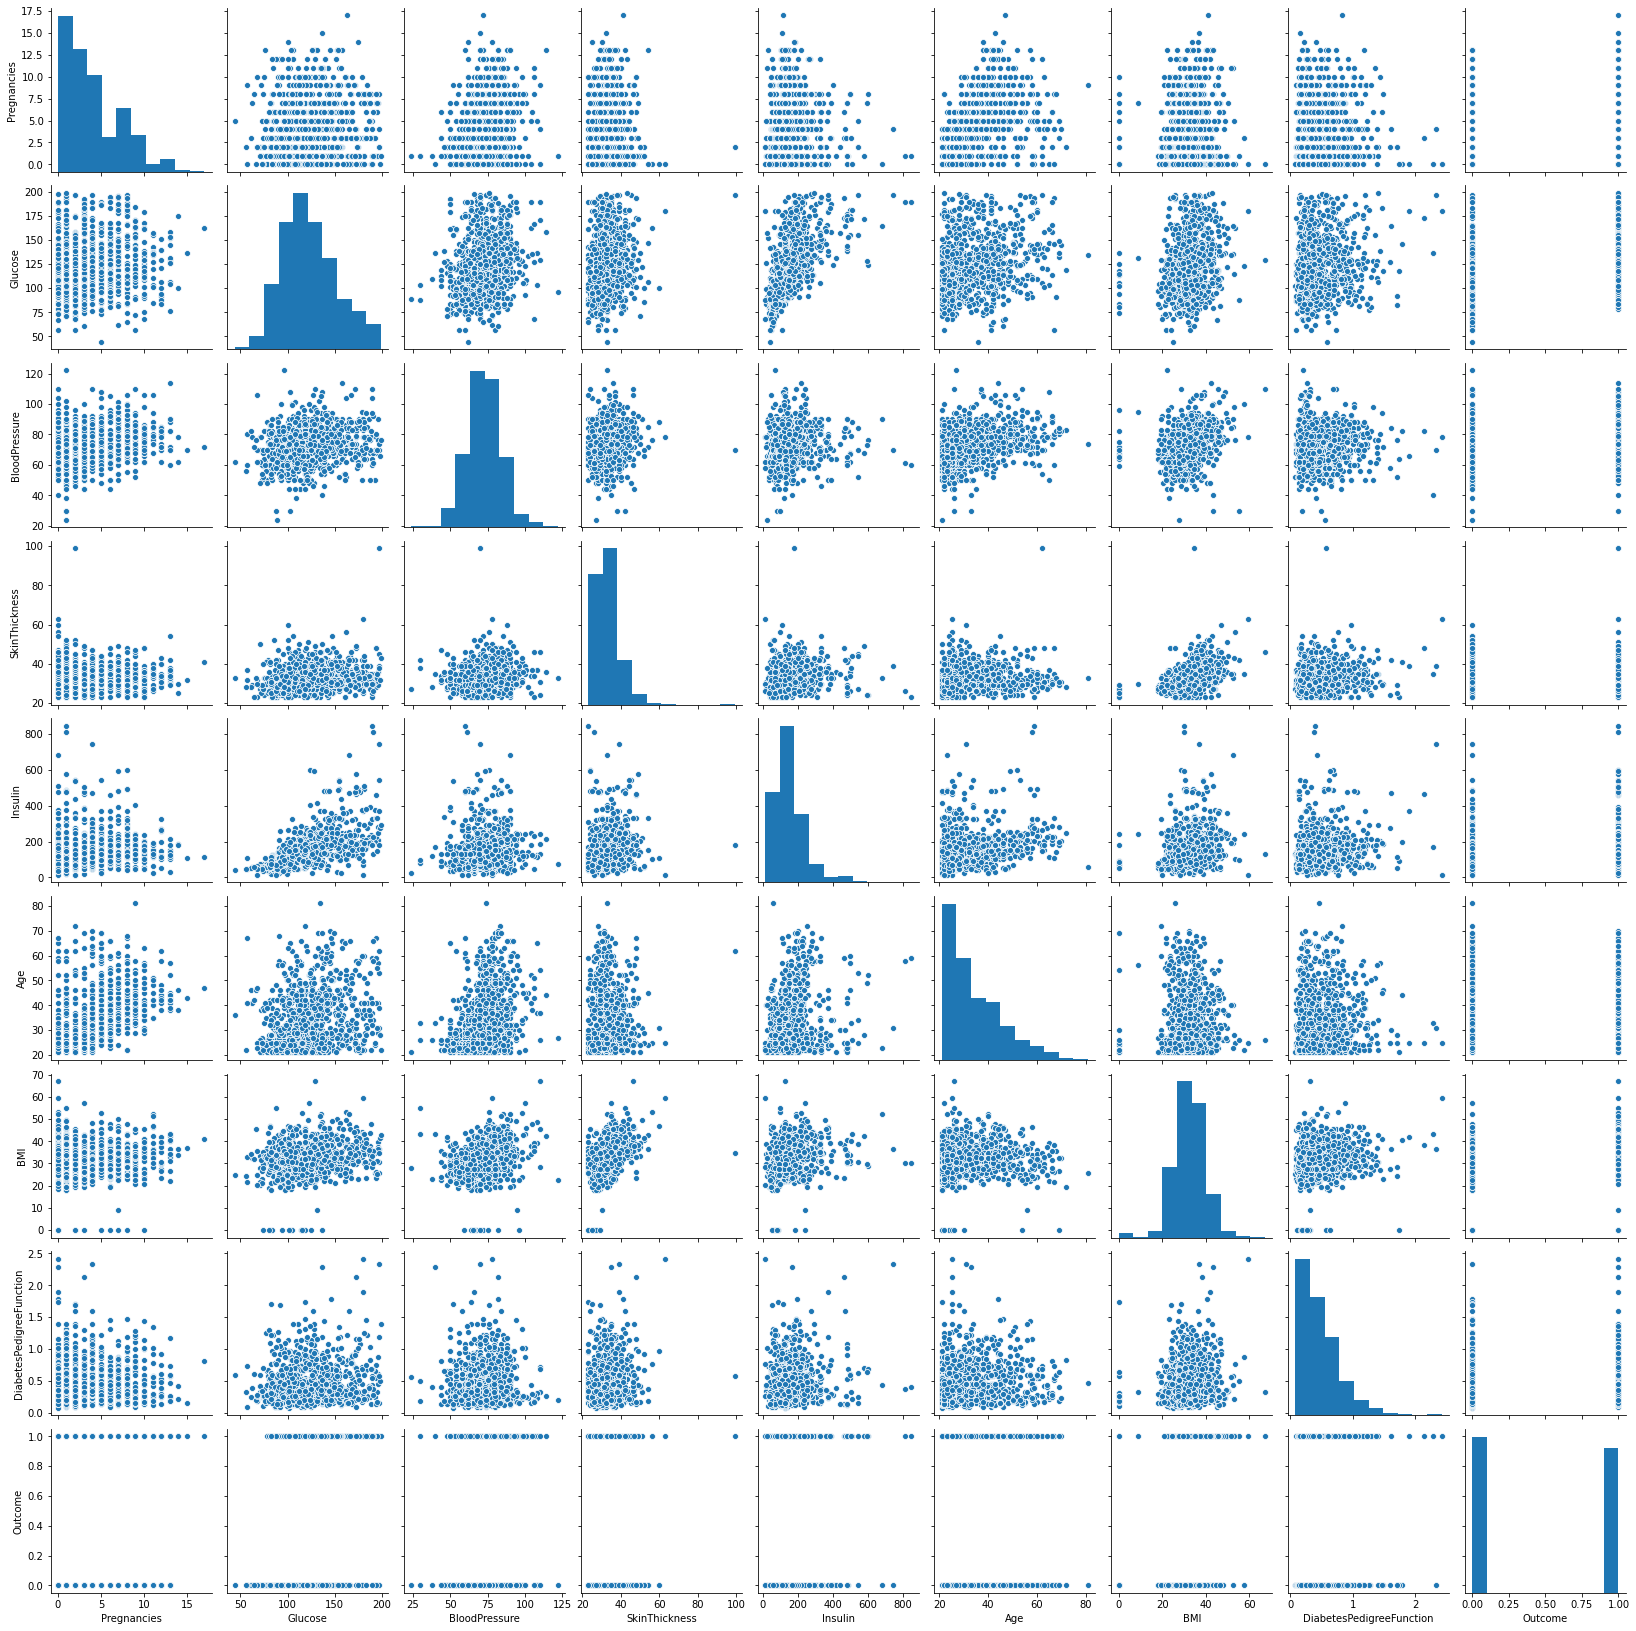

In [45]:
sns.pairplot(data2)

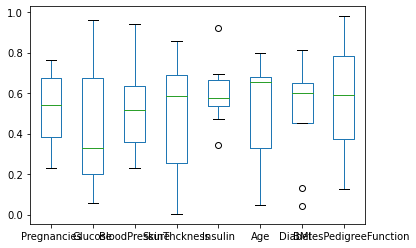

In [46]:
df = pd.DataFrame(data = np.random.random(size=(8,8)), columns = ['Pregnancies','Glucose','BloodPressure','SkinThckness','Insulin','Age','BMI','DiabetesPedigreeFunction'])
df.plot(kind='box')
plt.show()

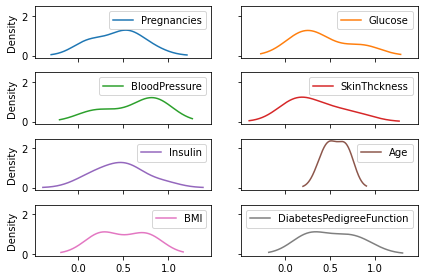

In [47]:
df = pd.DataFrame(data = np.random.random(size=(8,8)), columns = ['Pregnancies','Glucose','BloodPressure','SkinThckness','Insulin','Age','BMI','DiabetesPedigreeFunction'])
df.plot(kind='kde', subplots=True, layout=(4, 2), sharex=True, sharey=True)
plt.tight_layout()

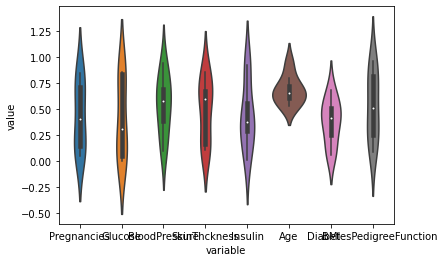

In [48]:
df = pd.DataFrame(data = np.random.random(size=(8,8)), columns = ['Pregnancies','Glucose','BloodPressure','SkinThckness','Insulin','Age','BMI','DiabetesPedigreeFunction'])
sns.violinplot(x='variable', y='value', data=pd.melt(df))
plt.show()

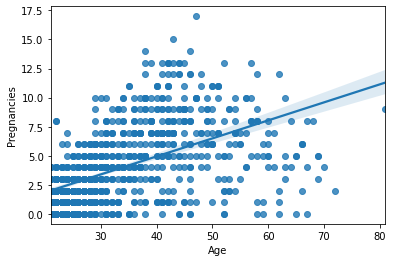

In [49]:
sns.regplot(data2['Age'], data2['Pregnancies'])

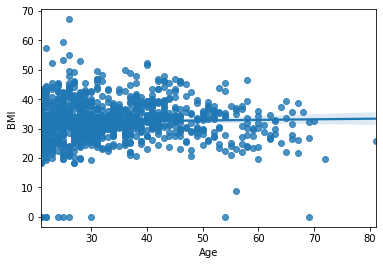

In [50]:
sns.regplot(data2['Age'], data2['BMI'])

### Feature Selection: 


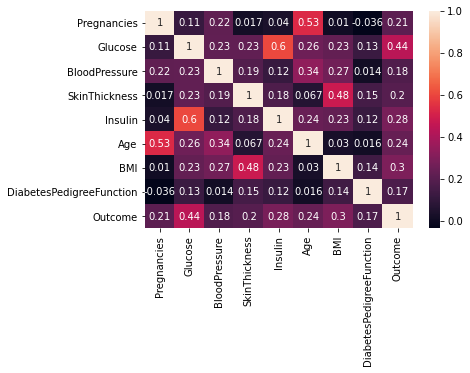

In [51]:
corr = data2.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Well as we can see none of the feature pairs are correlating more than 90%. Let's move forward with Feature selection using p-value test. <br><br>

Well we need to now separate our features and target column. **From the above data visualization it must be clear that the column "Outcome" is our target variable as it has values which are either 0 or 1**.

In [52]:
X = data2.drop('Outcome', axis=1)
Y = data2['Outcome']

In [53]:
selected_columns = X.columns.values

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns_pi = backwardElimination(X.values, Y.values, SL, selected_columns)

In [54]:
selected_columns_pi

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction'], dtype=object)

In [55]:
X = pd.DataFrame(data=data_modeled, columns=selected_columns_pi)

In [56]:
X['Outcome'] = Y.values

In [57]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0          6.0    148.0           72.0           35.0  33.6   
1          1.0     85.0           66.0           29.0  26.6   
2          8.0    183.0           64.0           32.0  23.3   
3          1.0     89.0           66.0           23.0  28.1   
4          0.0    137.0           40.0           35.0  43.1   

   DiabetesPedigreeFunction  Outcome  
0                     0.627        1  
1                     0.351        0  
2                     0.672        1  
3                     0.167        0  
4                     2.288        1

Now that we have pruned our features, we shall move on to splitting the dataset.
<br><br> 

### Data Split:

We split the data into **80% training** and **20% testing** and shall put the test set away.

In [58]:
train,test = train_test_split(X, random_state=42, test_size=0.2)

In [59]:
train.shape

(770, 7)

In [60]:
train_x = train.drop('Outcome', axis=1) 
train_y = train['Outcome']

test_x = test.drop('Outcome', axis=1) 
test_y = test['Outcome']

### Feature Scaling:


In [61]:
Stdscalar = StandardScaler()

train_x = Stdscalar.fit_transform(train_x)
test_x = Stdscalar.fit_transform(test_x)

In [62]:
train_x = normalize(train_x) 
test_x = normalize(test_x)

## Predictive Analytics:

#### NAIVE BAYES CLASSIFICATION:

**Naive Bayes** is the **Gold standard of classification** algorithm, simply because **for real life data we can never find out the conditional probability**. Naive bayes finds achieve a good classification score by naively considers every feature as an independent variable and computes the conditional probabilty.<br><br> We now load in the Naive Bayes classifier from Scikit learn and train our model.

In [63]:
nb_m = GaussianNB()

nb_m.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
prediction_train = nb_m.predict(train_x)

In [82]:
print('Naive Bayes: ')
print('Accuracy over Training set: {}'.format(accuracy_train))

Naive Bayes: 
Accuracy over Training set: 0.7077922077922078


In [83]:
confusion_matrix_train = confusion_matrix(train_y, prediction_train) 
print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train))

Confusion Matrix over Training set: [[281 118]
 [107 264]]


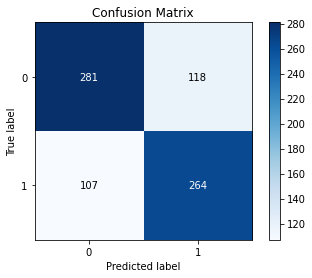

In [84]:
preds = nb_m.predict(train_x)
skplt.metrics.plot_confusion_matrix(y_true=train_y, y_pred=preds)
plt.show()

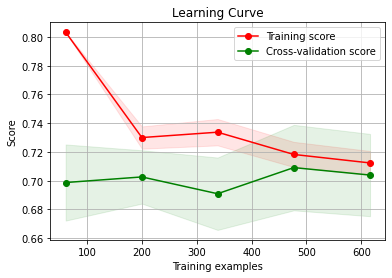

In [85]:
skplt.estimators.plot_learning_curve(nb_m, train_x, train_y)
plt.show()

#### Decision Tree Classification:

Now we shall implement the Decision Tree Classifier from Sklearn library. Here the Decision tree from Scikit learn library uses the **CART algorithm** at its core. <br><br>We shall proceed forward to train our Decision Tree classification model. We follow the same implementation workflow as Naive Bayes classifer.

In [69]:
tree_clf = DecisionTreeClassifier(random_state=0)

In [70]:
tree_clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [77]:
prediction_train_tree = tree_clf.predict(train_x)



In [78]:
print('Decision Tree: ')
print('Accuracy over Training set: {}'.format(accuracy_train_tree))

Decision Tree: 
Accuracy over Training set: 1.0


Wow! thats **100% accuracy** on training set. But does it actually tell us how good our model  is performing classificaton, lets check what the other metrices say about this.

In [79]:
confusion_matrix_train_tree = confusion_matrix(train_y, prediction_train_tree) 

print('Confusion Matrix over Training set: {}'.format(confusion_matrix_train_tree))

Confusion Matrix over Training set: [[399   0]
 [  0 371]]


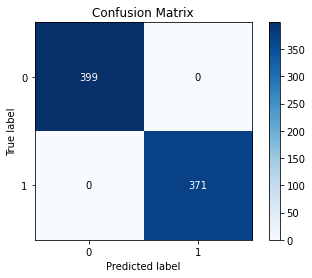

In [80]:
preds = tree_clf.predict(train_x)
skplt.metrics.plot_confusion_matrix(y_true=train_y, y_pred=preds)
plt.show()

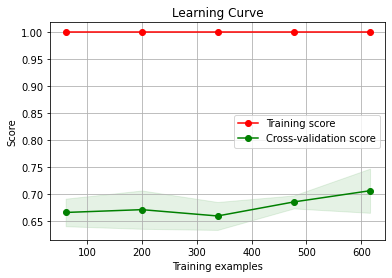

In [75]:
skplt.estimators.plot_learning_curve(tree_clf, train_x, train_y)
plt.show()

As we can see the training scorve is very high i.e. it tells us that the model is 100% accurate and our validation score is very low i.e it tells us our model accuracy is 69%. As validation score is very low compared to training score we can say our **decision tree model** is **completely overfitting** on the training data Thus it cannot generalize well to the real world data.<br><br>lets move forward to visualize our decision tree classifier.

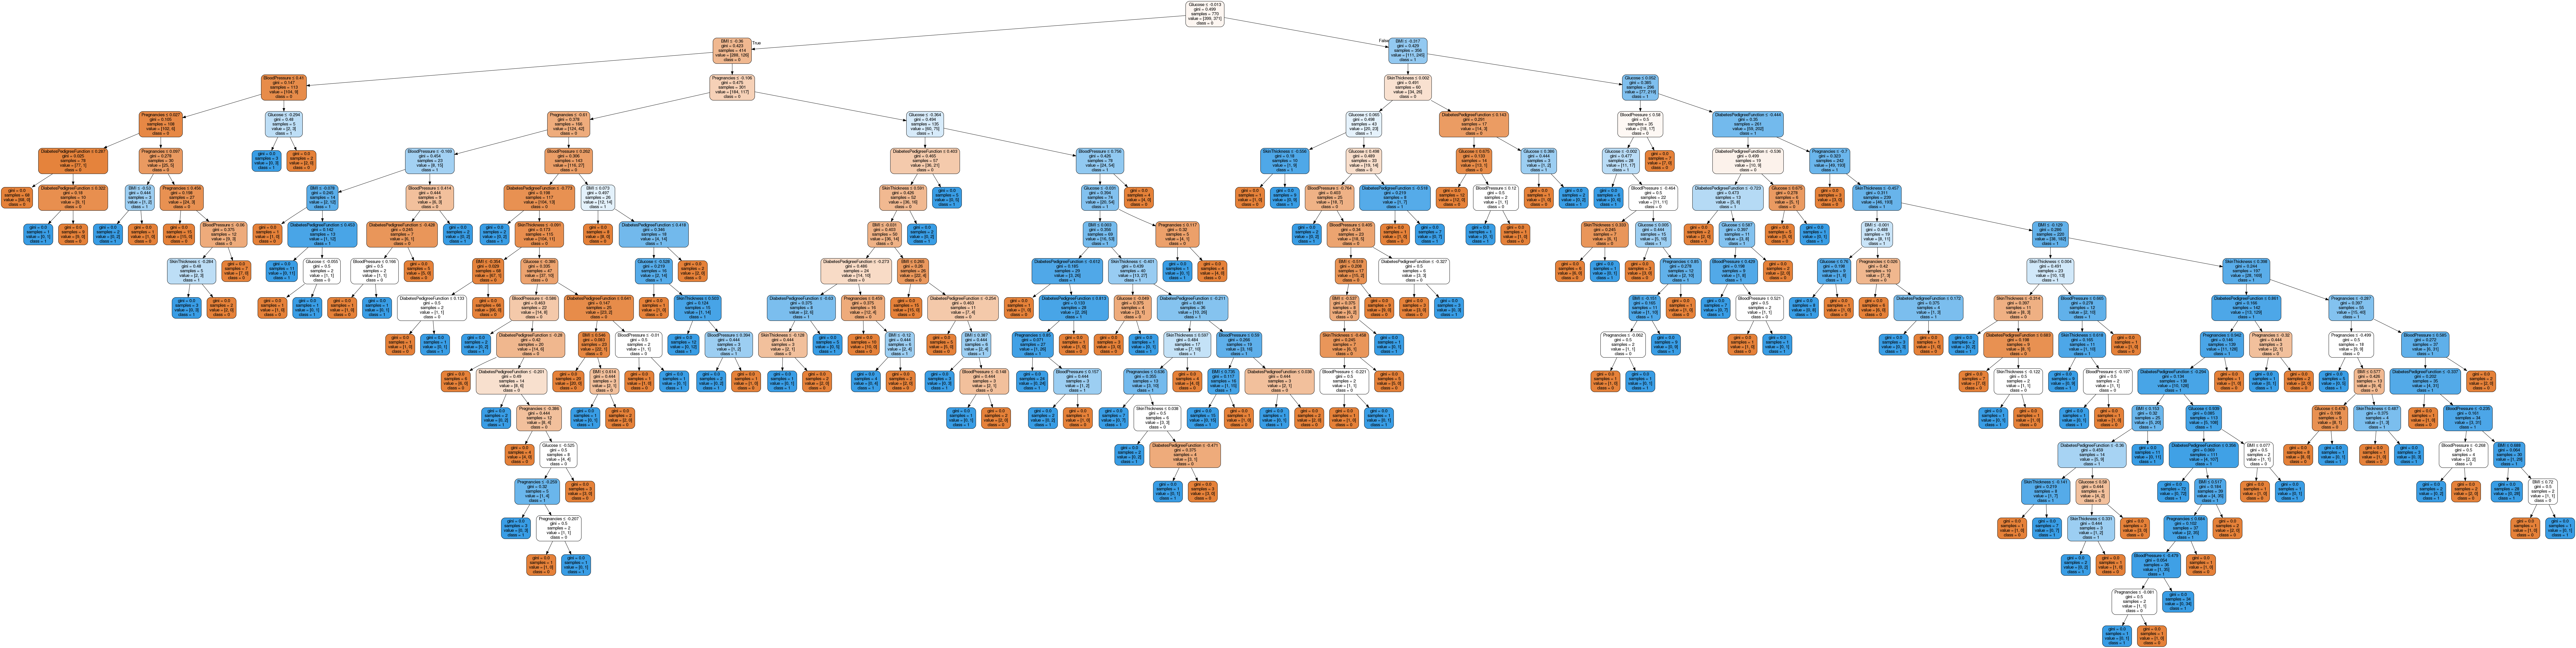

In [76]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names =selected_columns_pi,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())